<a href="https://colab.research.google.com/github/Franziska-Leite/Automobile-Data-Analysis/blob/main/Automobile_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1>Analysis of Automobile Data</h1>

<h2>Data Source:</h2>
You can find the "Automobile Dataset" from the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

<h2>Objective:</h2>
Determine the main characteristics that have the most impact on the car price

<h2>Data Wrangling:</h2>

In a previous notebook, the dataset has already been cleaned as followed:
- assignment of column names
- handling of missing values (replacement by average value, replacement by most frequent value, entire rows excluded)
- data formatting, bringing data in common standard of expression and right data type
- data normalization (simple feature scaling)
- data binning
- turning some categorical values to numeric values

The updated dataset has then been saved locally as csv-file.

# Import .csv-file from local directory

In [1]:
#import necessary libraries
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#upload local file to this notebook
##copy path and store it in dataframe df
path= "/content/drive/MyDrive/data_updated.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,Unnamed: 0,price,symboling,normalized-losses,make,body-style,drive-wheels,wheel-base,engine-location,engine-size,...,highway-mpg,highway-L/100km,horsepower,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,4-doors,2-doors
0,0,13495.0,3,122,alfa-romero,convertible,rwd,88.6,front,130,...,27,8.703704,111,Low,0,1,1,0,0,1
1,1,16500.0,3,122,alfa-romero,convertible,rwd,88.6,front,130,...,27,8.703704,111,Low,0,1,1,0,0,1
2,2,16500.0,1,122,alfa-romero,hatchback,rwd,94.5,front,152,...,26,9.038462,154,Medium,0,1,1,0,0,1
3,3,13950.0,2,164,audi,sedan,fwd,99.8,front,109,...,30,7.833333,102,Low,0,1,1,0,1,0
4,4,17450.0,2,164,audi,sedan,4wd,99.4,front,136,...,22,10.681818,115,Low,0,1,1,0,1,0


# Exploratory Data Analysis

##**1. Analyzing Individual Feature Patterns Using Visualization**

In [6]:
#Import visualization packages "Matplotlib" and "Seaborn"
##Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [7]:
# list the data types for each column
print(df.dtypes)

Unnamed: 0             int64
price                float64
symboling              int64
normalized-losses      int64
make                  object
body-style            object
drive-wheels          object
wheel-base           float64
engine-location       object
engine-size            int64
engine-type           object
normalized-length    float64
normalized-width     float64
normalized-height    float64
curb-weight            int64
num-of-cylinders      object
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
peak-rpm             float64
city-mpg               int64
city-L/100km         float64
highway-mpg            int64
highway-L/100km      float64
horsepower             int64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
aspiration-std         int64
aspiration-turbo       int64
4-doors                int64
2-doors                int64
dtype: object


In [8]:
#rearrange columns
cols = df.columns.tolist()
cols

['Unnamed: 0',
 'price',
 'symboling',
 'normalized-losses',
 'make',
 'body-style',
 'drive-wheels',
 'wheel-base',
 'engine-location',
 'engine-size',
 'engine-type',
 'normalized-length',
 'normalized-width',
 'normalized-height',
 'curb-weight',
 'num-of-cylinders',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'peak-rpm',
 'city-mpg',
 'city-L/100km',
 'highway-mpg',
 'highway-L/100km',
 'horsepower',
 'horsepower-binned',
 'fuel-type-diesel',
 'fuel-type-gas',
 'aspiration-std',
 'aspiration-turbo',
 '4-doors',
 '2-doors']

In [9]:
#drop column 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
colsNew=['price', 'symboling',
 'normalized-losses',
 'make',
 'body-style',
 'drive-wheels','wheel-base',
 'engine-location',
 'engine-size','engine-type',
 'normalized-length',
 'normalized-width',
 'normalized-height',
 'curb-weight',
  'num-of-cylinders',
  'fuel-system',
 'bore',
 'stroke',
 'compression-ratio','peak-rpm',
  'city-mpg','city-L/100km',
 'highway-mpg', 'highway-L/100km',
 'horsepower',
 'horsepower-binned', 'fuel-type-diesel',
 'fuel-type-gas',
 'aspiration-std',
 'aspiration-turbo',
 '4-doors',
 '2-doors']

In [11]:
df = df[colsNew]
df.head()

,price,symboling,normalized-losses,make,body-style,drive-wheels,wheel-base,engine-location,engine-size,engine-type,...,highway-mpg,highway-L/100km,horsepower,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,4-doors,2-doors
0,13495.0,3,122,alfa-romero,convertible,rwd,88.6,front,130,dohc,...,27,8.703704,111,Low,0,1,1,0,0,1
1,16500.0,3,122,alfa-romero,convertible,rwd,88.6,front,130,dohc,...,27,8.703704,111,Low,0,1,1,0,0,1
2,16500.0,1,122,alfa-romero,hatchback,rwd,94.5,front,152,ohcv,...,26,9.038462,154,Medium,0,1,1,0,0,1
3,13950.0,2,164,audi,sedan,fwd,99.8,front,109,ohc,...,30,7.833333,102,Low,0,1,1,0,1,0
4,17450.0,2,164,audi,sedan,4wd,99.4,front,136,ohc,...,22,10.681818,115,Low,0,1,1,0,1,0


In [12]:
#Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187923,0.098322
compression-ratio,0.001263,0.187923,1.000000,-0.214489
horsepower,0.566903,0.098322,-0.214489,1.000000


###1.1 Continuous Numerical Variables:

In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.

####Engine size

(0.0, 53314.01992857231)

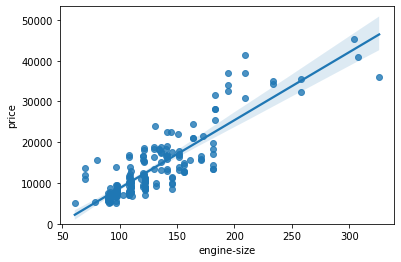

In [13]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables.
Since the regression line is almost a perfect diagonal line, engine-size seems like a pretty good predictor of the price.

In [14]:
#examine the correlation between 'engine-size' and 'price'
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


The correlation between engine size and price is approximately 0.87 . 

#### Highway mpg

(0.0, 48175.01827186168)

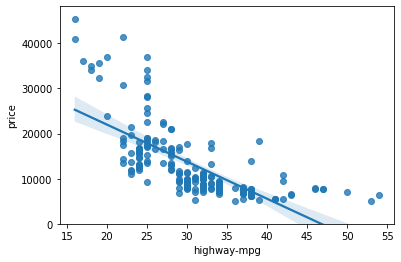

In [15]:
# Highway-mpg as potential predictor variable of price
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [16]:
#examine the correlation between 'highway-mpg' and 'price'
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables.
Highway-mpg could potentially be a predictor of price.

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.

####Peak-rpm (weak linear relationship)

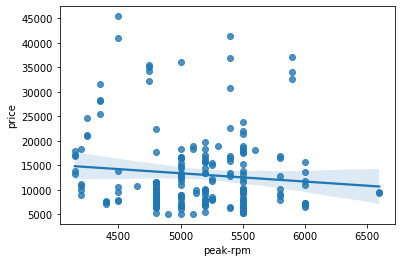

In [17]:
# Peak-rpm as potential predictor variable of price
sns.regplot(x="peak-rpm", y="price", data=df)

In [18]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal.
Also, the data points are very scattered and far from the fitted line, showing lots of variability.
Therefore, it's not a reliable variable.

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.

####Symboling (weak linear relationship)

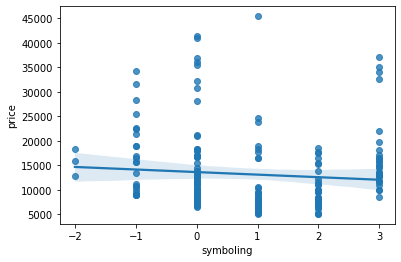

In [19]:
sns.regplot(x="symboling", y="price", data=df)

###1.2 Categorical Variables:

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

#####Body-style

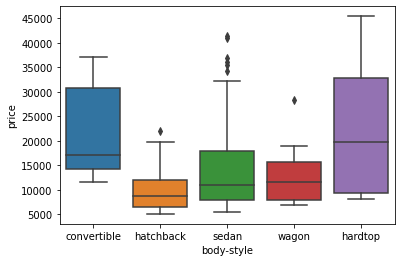

In [20]:
#Examine the relationship between "body-style" and "price"
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. 

####Engine Location

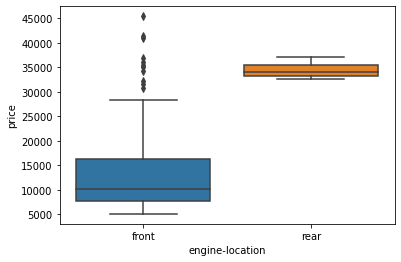

In [21]:
#Examine the relationship between "engine-location" and "price"
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

####Drive wheels

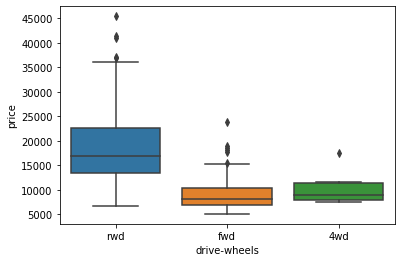

In [22]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

For the other categorical features, see under 2. Descriptive Statistical Analysis.

##**2. Descriptive Statistical Analysis**

In [23]:
df.describe()

,price,symboling,normalized-losses,wheel-base,engine-size,normalized-length,normalized-width,normalized-height,curb-weight,bore,...,city-L/100km,highway-mpg,highway-L/100km,horsepower,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,4-doors,2-doors
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,13207.129353,0.840796,122.00000,98.797015,126.875622,0.837102,0.915126,0.899108,2555.666667,3.330692,...,9.944145,30.686567,8.044957,103.402985,0.099502,0.900498,0.820896,0.179104,0.572139,0.427861
std,7947.066342,1.254802,31.99625,6.066366,41.546834,0.059213,0.029187,0.040933,517.296727,0.268072,...,2.534599,6.815150,1.840739,37.365650,0.300083,0.300083,0.384397,0.384397,0.496004,0.496004
min,5118.000000,-2.000000,65.00000,86.600000,61.000000,0.678039,0.837500,0.799331,1488.000000,2.540000,...,4.795918,16.000000,4.351852,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7775.000000,0.000000,101.00000,94.500000,98.000000,0.801538,0.890278,0.869565,2169.000000,3.150000,...,7.833333,25.000000,6.911765,70.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,10295.000000,1.000000,122.00000,97.000000,120.000000,0.832292,0.909722,0.904682,2414.000000,3.310000,...,9.791667,30.000000,7.833333,95.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,16500.000000,2.000000,137.00000,102.400000,141.000000,0.881788,0.925000,0.928094,2926.000000,3.580000,...,12.368421,34.000000,9.400000,116.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,45400.000000,3.000000,256.00000,120.900000,326.000000,1.000000,1.000000,1.000000,4066.000000,3.940000,...,18.076923,54.000000,14.687500,262.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.describe(include=['object'])

,make,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201
unique,22,5,3,2,6,7,8,3
top,toyota,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,94,118,198,145,157,92,153


In [25]:
#let´s see how many values we have in each category of drive-wheels
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame() #saves value_counts result as new df
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True) #changes column name "drive-wheels" to "value_counts"
drive_wheels_counts.index.name = 'drive-wheels' #changes index to #drive-wheels"
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [26]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

For all categorical variables: plotting against price in a boxplot and checking the equal representation of each category.

#####Engine type

,engine-type
ohc,145
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4


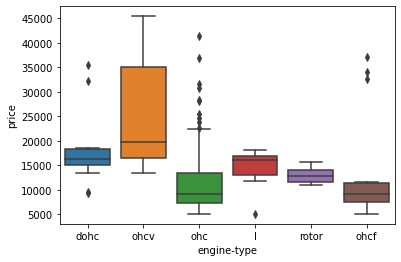

In [27]:
# engine-type as variable
sns.boxplot(x="engine-type", y="price", data=df)
enginetype_counts=df["engine-type"].value_counts().to_frame()
enginetype_counts

####Number of cylinders

,num-of-cylinders
four,157
six,24
five,10
two,4
eight,4
three,1
twelve,1


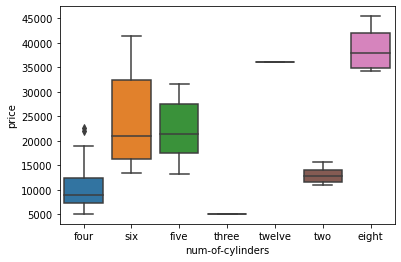

In [28]:
# num-of-cylinders as variable
sns.boxplot(x="num-of-cylinders", y="price", data=df)
cylinders_counts=df["num-of-cylinders"].value_counts().to_frame()
cylinders_counts

####Fuel System

,fuel-system
mpfi,92
2bbl,64
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


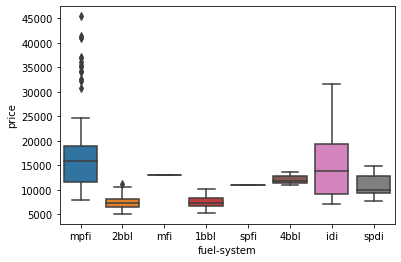

In [29]:
# fuel-system as variable
sns.boxplot(x="fuel-system", y="price", data=df)
fuelSystem_counts=df["fuel-system"].value_counts().to_frame()
fuelSystem_counts

##**3. Grouping**

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

In [30]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [63]:
#to know which type of drive wheel is most valuable, 
##we can group "drive-wheels" and then average them

df_group_one = df[['drive-wheels','price']]

In [64]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [33]:
# Grouping of multiple variables.
##Groups the dataframe by the unique combination of 'drive-wheels' and 'body-style' results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [34]:
#pivot results for better visualization
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [35]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

##**4. Analyzing Multiple Feature Patterns Using Vizualization**

Pcolor is a visually striking visualization technique which you can use to visualize two dimensional datasets

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline 

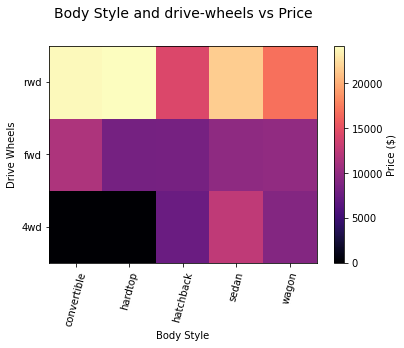

In [65]:
#use the grouped results in a heat map to visualize the relationship between Body Style and drive-wheels vs Price.
plt.pcolor(grouped_pivot, cmap='magma')

#title
plt.title('Body Style and drive-wheels vs Price', size=14, y=1.1) #y=1.1 for space between title and figure

#legend
cbar = plt.colorbar()
cbar.set_label("Price ($)") #optional: (..., rotation=270)

#axis configurations
plt.xlabel("Body Style")
plt.ylabel("Drive Wheels")
plt.yticks(np.arange(3)+0.5, ["4wd",	"fwd",	"rwd"])
plt.xticks(np.arange(5)+0.5, ["convertible",	"hardtop",	"hatchback", "sedan",	"wagon"], rotation=75) #+0.5 to centralize the ticks in squares

##code for automatization of label names
#row_labels = grouped_pivot.columns.levels[1]
#col_labels = grouped_pivot.index
##insert labels
#ax.set_xticklabels(row_labels, minor=False)
#ax.set_yticklabels(col_labels, minor=False)
##move ticks and labels to the center
#ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
#ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

##**4. Correlation Matrix Analysis**

In [39]:
#create Pearson correlation matrix of all features
corr_matrix=df.corr()
corr_matrix

,price,symboling,normalized-losses,wheel-base,engine-size,normalized-length,normalized-width,normalized-height,curb-weight,bore,...,city-L/100km,highway-mpg,highway-L/100km,horsepower,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,4-doors,2-doors
price,1.000000,-0.082391,0.133999,0.584642,0.872335,0.690628,0.751265,0.135486,0.834415,0.543155,...,0.789898,-0.704692,0.801118,0.809607,0.110326,-0.110326,-0.179578,0.179578,0.042435,-0.042435
symboling,-0.082391,1.000000,0.466264,-0.535987,-0.110581,-0.365404,-0.242423,-0.550160,-0.233118,-0.140019,...,0.066171,0.036233,-0.029807,0.075810,-0.196735,0.196735,0.054615,-0.054615,-0.672344,0.672344
normalized-losses,0.133999,0.466264,1.000000,-0.056661,0.112360,0.019424,0.086802,-0.373737,0.099404,-0.029862,...,0.238567,-0.181877,0.181189,0.217300,-0.101546,0.101546,0.006911,-0.006911,-0.361368,0.361368
wheel-base,0.584642,-0.535987,-0.056661,1.000000,0.572027,0.876024,0.814507,0.590742,0.782097,0.493244,...,0.476153,-0.543304,0.577576,0.371178,0.307237,-0.307237,-0.256889,0.256889,0.445245,-0.445245
engine-size,0.872335,-0.110581,0.112360,0.572027,1.000000,0.685025,0.729436,0.074694,0.849072,0.572609,...,0.745059,-0.679571,0.783465,0.822668,0.070779,-0.070779,-0.110040,0.110040,0.024094,-0.024094
normalized-length,0.690628,-0.365404,0.019424,0.876024,0.685025,1.000000,0.857170,0.492063,0.880665,0.608971,...,0.657373,-0.698142,0.707108,0.579795,0.211187,-0.211187,-0.230085,0.230085,0.395122,-0.395122
normalized-width,0.751265,-0.242423,0.086802,0.814507,0.729436,0.857170,1.000000,0.306002,0.866201,0.544885,...,0.673363,-0.680635,0.736728,0.615056,0.244356,-0.244356,-0.305732,0.305732,0.227655,-0.227655
normalized-height,0.135486,-0.550160,-0.373737,0.590742,0.074694,0.492063,0.306002,1.000000,0.307581,0.180449,...,0.003811,-0.104812,0.084301,-0.087001,0.281578,-0.281578,-0.090336,0.090336,0.538383,-0.538383
curb-weight,0.834415,-0.233118,0.099404,0.782097,0.849072,0.880665,0.866201,0.307581,1.000000,0.644060,...,0.785353,-0.794889,0.836921,0.757981,0.221046,-0.221046,-0.321955,0.321955,0.208517,-0.208517
bore,0.543155,-0.140019,-0.029862,0.493244,0.572609,0.608971,0.544885,0.180449,0.644060,1.000000,...,0.554610,-0.591309,0.559112,0.566903,0.054458,-0.054458,-0.227816,0.227816,0.119222,-0.119222


###4.1 Filtering For Top Correlations

In [66]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):

        # Print variables with high correlation (define your treshould)
        if abs(corr_matrix.iloc[i, j]) > abs(0.75):
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

engine-size price 0.8723351674455182
normalized-length wheel-base 0.8760238919618003
normalized-width price 0.7512653440522677
normalized-width wheel-base 0.8145066522681036
normalized-width normalized-length 0.8571703218913007
curb-weight price 0.8344145257702849
curb-weight wheel-base 0.782097244415664
curb-weight engine-size 0.849071660641531
curb-weight normalized-length 0.8806647862654422
curb-weight normalized-width 0.8662010980938419
city-L/100km price 0.7898975136626949
city-L/100km curb-weight 0.7853533294476132
city-L/100km city-mpg -0.9497129106167611
highway-mpg curb-weight -0.7948889423035673
highway-mpg city-mpg 0.9720437058960102
highway-mpg city-L/100km -0.9300278818761628
highway-L/100km price 0.8011176263981975
highway-L/100km engine-size 0.783464520862827
highway-L/100km curb-weight 0.8369206502056042
highway-L/100km city-mpg -0.9090237549298256
highway-L/100km city-L/100km 0.9583056447789671
highway-L/100km highway-mpg -0.9511004402179783
horsepower price 0.80960680

###4.2 Identification Of Top Correlations With Target Variable "price" Using Visualization

In [79]:
# Isolate the column corresponding to "price"
corr_target = corr_matrix[['price']].drop(labels=['price'])
corr_target

,price
symboling,-0.082391
normalized-losses,0.133999
wheel-base,0.584642
engine-size,0.872335
normalized-length,0.690628
normalized-width,0.751265
normalized-height,0.135486
curb-weight,0.834415
bore,0.543155
stroke,0.082310


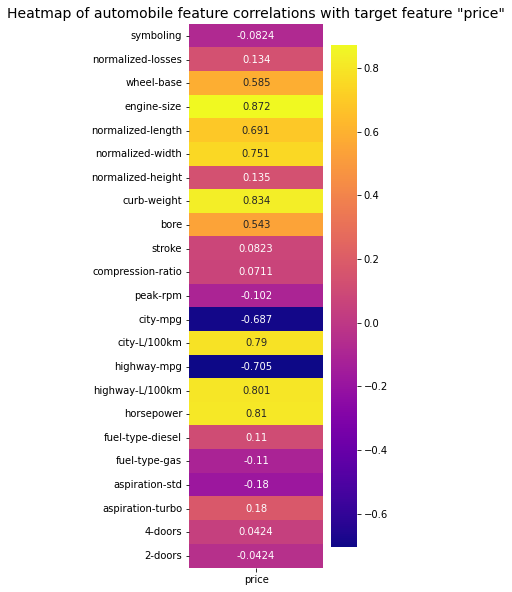

In [86]:
# Plot result as heatmap
plt.figure(figsize=(3,10))
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='plasma')
plt.title('Heatmap of automobile feature correlations with target feature "price"', size=14, y=1.5)
plt.show()

Analysing the Heatmap, we can identify 9 features with the highest correlation to our target feature "price":

*   Wheel base
*   Normalized Length
*   Normalized Width
*   Engine size
*   Curb weight
*   Bore
*   City L/100km (or City mpg)
*   Highway L/100km (or Highway mpg)
*   Horsepower

Check for linear relationship of the 9 top features:

(0.0, 47607.839357181554)

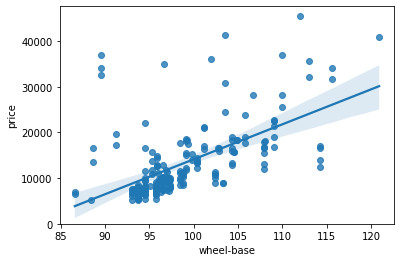

In [43]:
# Check regression line of the potential predictor variables of price
sns.regplot(x="wheel-base", y="price", data=df)
plt.ylim(0,)

(0.0, 47858.220505916084)

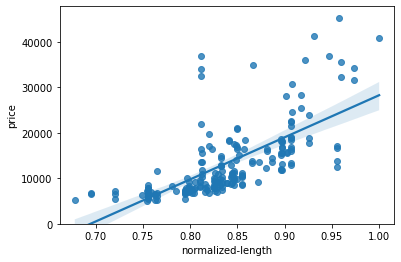

In [44]:
# Check regression line of the potential predictor variables of price
sns.regplot(x="normalized-length", y="price", data=df)
plt.ylim(0,)

(0.0, 47920.40422536501)

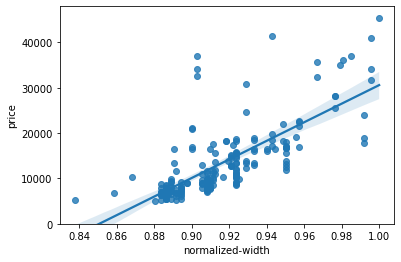

In [45]:
# Check regression line of the potential predictor variables of price
sns.regplot(x="normalized-width", y="price", data=df)
plt.ylim(0,)

(0.0, 53332.01054083661)

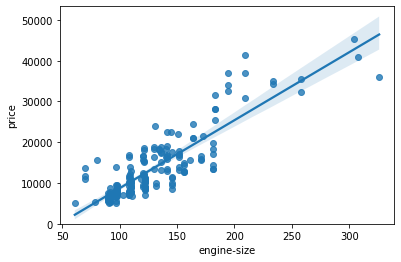

In [46]:
# Check regression line of the potential predictor variables of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

(0.0, 47757.88963131601)

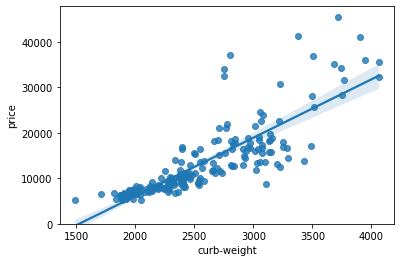

In [47]:
# Check regression line of the potential predictor variables of price
sns.regplot(x="curb-weight", y="price", data=df)
plt.ylim(0,)

(0.0, 47794.58438089136)

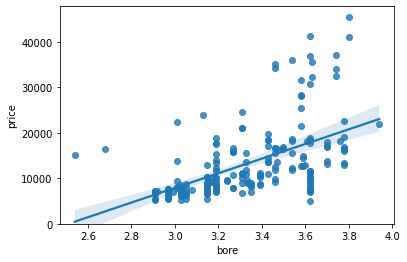

In [48]:
# Check regression line of the potential predictor variables of price
sns.regplot(x="bore", y="price", data=df)
plt.ylim(0,)

(0.0, 47722.22456774451)

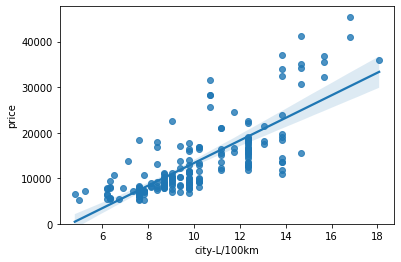

In [49]:
# Check regression line of the potential predictor variables of price
sns.regplot(x="city-L/100km", y="price", data=df)
plt.ylim(0,)

(0.0, 47710.65691094286)

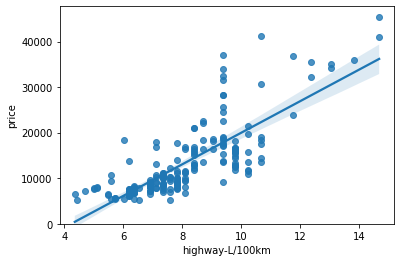

In [50]:
# Check regression line of the potential predictor variables of price
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.ylim(0,)

(0.0, 47535.94883050766)

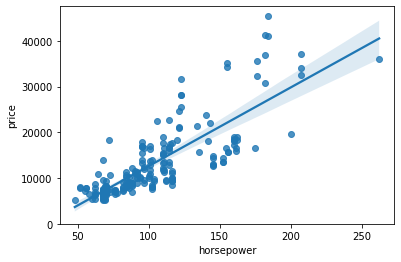

In [51]:
# Check regression line of the potential predictor variables of price
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

All of the identified features seem to have a positive linear relationship with the target "price". The regression line for engine size and horsepower is almost a perfect diagonal.

**P-Value**

Let´s also check the P-value, which indicates is the probability value that the correlation between these two variables is statistically significant.
Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.
By convention, when the

<ul>
    <li>p-value is < 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is < 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is < 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is > 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [52]:
# Determining the P-Value

from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient for wheel-base vs price is", pearson_coef, "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient for wheel-base vs price is 0.584641822265508 
with a P-value of P = 8.076488270733218e-20


In [53]:
pearson_coef, p_value = stats.pearsonr(df['normalized-length'], df['price'])
print("The Pearson Correlation Coefficient for normalized-length vs price  is", pearson_coef, "\nwith a P-value of P =", p_value) 

The Pearson Correlation Coefficient for normalized-length vs price  is 0.6906283804483639 
with a P-value of P = 8.016477466159328e-30


In [54]:
pearson_coef, p_value = stats.pearsonr(df['normalized-width'], df['price'])
print("The Pearson Correlation Coefficient for normalized-width vs price is", pearson_coef, "\nwith a P-value of P =", p_value) 

The Pearson Correlation Coefficient for normalized-width vs price is 0.7512653440522675 
with a P-value of P = 9.200335510481123e-38


In [55]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient for engine-size vs price is", pearson_coef, "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient for engine-size vs price is 0.8723351674455185 
with a P-value of P = 9.265491622198389e-64


In [56]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient for curb-weight vs price is", pearson_coef, "\nwith a P-value of P =", p_value)

The Pearson Correlation Coefficient for curb-weight vs price is 0.8344145257702843 
with a P-value of P = 2.189577238894065e-53


In [57]:
earson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient for bore vs price is", pearson_coef, "\nwith a P-value of P =", p_value)

The Pearson Correlation Coefficient for bore vs price is 0.8344145257702843 
with a P-value of P = 8.049189483935489e-17


In [58]:
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient for city-L/100km vs price is", pearson_coef, "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient for city-L/100km vs price is 0.7898975136626943 
with a P-value of P = 3.903106400939802e-44


In [59]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print("The Pearson Correlation Coefficient for highway-L/100km vs price is", pearson_coef, "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient for highway-L/100km vs price is 0.8011176263981973 
with a P-value of P = 3.0467845810415427e-46


In [60]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient for horsepower vs price is", pearson_coef, "\nwith a P-value of P =", p_value)  

The Pearson Correlation Coefficient for horsepower vs price is 0.8096068016571054 
with a P-value of P = 6.273536270650504e-48


Using the Pearson correlation coefficient and visualization techniques, we identified the strongest correlations with "price" and checked the linearity of their relationship. Since the p-value is < 0.001, these correlations are statistically significant.

#Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

*   Engine-size
*   Horsepower
*   City-L/100km
*   Highway-L/100km
*   Length
*   Width
*   Curb-weight
*   Wheel-base
*   Bore

Categorical variables:

*   Drive-wheels

Next, we can move into building machine learning models to automate our analysis. Feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.

# Save csv.file to google drive

In [61]:
#import mounting module to save file on google drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [62]:
#After authentication, copy your csv file
df.to_csv('data_updated.csv')
!cp data_updated.csv "drive/My Drive/" #rename file in drive